![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)
 
<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=Science/ClimateChange/climate-change.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"></a>

# Climate Change

## What do we know?

The Earth's climate has been subject to changes throughout history and most of these can be attributed to variations in Earth's orbit resulting in the amount of solar energy that is received. The reason behind significant increase in warming trend since the industrial revolution is extremely likely to be the result of human activity.

Earth is a complex integrated system of components and processes. A disturbance in one component can have unprecedented and irreversible effects over another component.

## How do we know it?

Earth-orbiting satellites and other scientific advancements have made it possible to understand Earth on a global scale and have enabled scientists to collect many different types of information about our planet, its climate and use it to analyze how it has changed over the years. 

It is important to understand the evidence available for global climate change and the potential impacts it can cause in order to address the challenges that we may face. Knowing how these Earth systems have changed in the past and how they are changing in response to climate change now will help us understand how they will likely change in the future.

Scientists gather data on global temperature, Carbon dioxide in the atmosphere, Arctic sea ice, land ice and sea level on a regular basis to analyze and understand how climate is changing over the years.

## Evidence for rapid climate change

### Evidence 1 : Global Land-Ocean Temperature index

Data Source & Inspiration: [NASA Global Climate Change](https://climate.nasa.gov/vital-signs/global-temperature/).

An increase in carbon dioxide and other human-made emissions into the atmosphere has caused our planet's average surface temperature to rise by 1.1 degrees Celsius since the late nineteenth century.

`▶Run` the following code cell to see a visualization created by NASA's scientific visualization studio showing the Global temperature anomalies from 1880 to 2017.

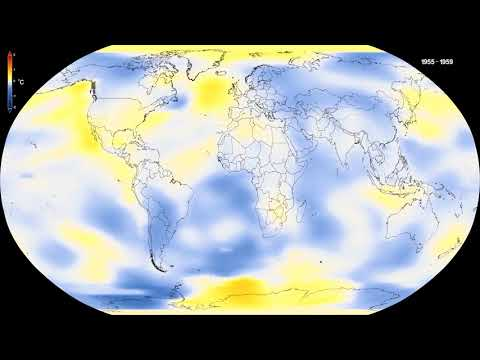

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('xlrFFiSROmg')

#### Code Libraries

The next code cell imports a number of code libraries that we will use in this notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import plotly.graph_objs as go
import cartopy.crs as ccrs
import imageio
import os
import numpy as np
from datetime import timedelta, datetime
from IPython.display import Image

print('Code libraries imported')

In [ ]:
climate_data_url = 'https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt'
global_temperature_df = pd.read_csv(climate_data_url, sep='\s+', skiprows=[0, 1, 2, 4])
global_temperature_df.rename(columns={'No_Smoothing':'Annual Mean', 'Lowess(5)':'Lowess Smoothing'}, inplace=True)

trace0 = go.Scatter(
    x = global_temperature_df['Year'],
    y = global_temperature_df['Annual Mean'],
    mode = 'lines+markers',
    name = 'Annual Mean'
)

trace1 = go.Scatter(
    x = global_temperature_df['Year'],
    y = global_temperature_df['Lowess Smoothing'],
    mode = 'lines+markers',
    name = 'Lowess Smoothing'
)

data = [trace0,trace1]
layout = go.Layout(dict(title='Global Land-Ocean Temperature Index'),
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature Anomaly')
)
fig = go.Figure(data=data,layout=layout)
fig.show()

This graph illustrates the change in global surface temperature relative to 1951-1980 average temperatures. Seventeen of the 18 warmest years in the 136-year record all have occurred since 2001, with the exception of 1998. The year 2016 ranks as the warmest on record.

By looking at the graph above and the video, one can see that 2016 was the warmest year since modern record keeping began.

### Evidence 2: Decline in Extent and Thickness of Arctic Sea Ice

Scientists keep a close eye on Arctic sea ice as it warms through the years and it is found to be shrinking by about 13.2% per decade, relative to the 1981 to 2010 average.

Sea ice *area* and *extent* are two different measures and they provide different information. **Sea ice extent** is a measure of edges of sea ice and all of the space inside it, while **sea ice area** is a measure of where there is ice only, not including the areas that doesn't have ice. Extent is always a larger number than area when compared at the same period of time.

Decreases in both sea ice extent and area impact a wide variety of marine life that sustain in the Arctic right from single-celled algae to bowhead whales, polar bears, and other mammals, as well as indigenous people who rely on sea ice for transportation and hunting.

The data used below are curated by NASA's global climate change initiative, originally pulled from the [National Snow and Ice Data Center](https://nsidc.org/).

In [ ]:
url = 'https://climate.nasa.gov/system/internal_resources/details/original/1270_minimum_extents_and_area_north_SBA_reg_20171001_2_.txt'
arctic_ice_df = pd.read_csv(url, sep='\s+', skiprows=[0,1,2,3],header=None, names=['Year', 'MN', 'DY', 'Ice Extent', 'Year1', 'MN1', 'DY1', 'Ice Area'])
arctic_ice_df.head(10)

In [ ]:
trace0 = go.Scatter(
    x = arctic_ice_df['Year'],
    y = arctic_ice_df['Ice Extent'],
    mode = 'lines+markers',
    name = 'Ice Extent'
)

trace1 = go.Scatter(
x = arctic_ice_df['Year'],
y = arctic_ice_df['Ice Area'],
mode = 'lines+markers',
#opacity = 0.5,
name='Ice Area',
#hoverinfo = 'none'
)
data = [trace0, trace1]
layout = go.Layout(dict(title='Arctic Sea Ice Index'),
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Million Square Kilometers')
)
fig = go.Figure(data=data,layout=layout)
fig.show()

The code below generates an animation that represent sea ice concentration data from the [NASA Distributed Active Archive Center](https://nsidc.org/daac) at [National Snow & Ice Data Center](https://nsidc.org/).

*Data Source: Maslanik, J. and J. Stroeve. 1999, updated daily. Near-Real-Time DMSP SSMIS Daily Polar Gridded Sea Ice Concentrations, Version 1. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. doi: https://doi.org/10.5067/U8C09DWVX9LM. [April 2018]*

In [ ]:
sea_ice = ['./data/nt_20150418_f17_nrt_n.bin','./data/nt_20160331_f17_nrt_n.bin','./data/nt_20170418_f18_nrt_n.bin','./data/nt_20180423_f18_nrt_n.bin']

def prepare_data(ice_data):
    with open(ice_data, 'rb') as fr:
        hdr = fr.read(300)
        ice = np.fromfile(fr, dtype=np.uint8)

    ice = ice.reshape(448, 304)

    ice = ice / 250.

    ice = np.ma.masked_greater(ice, 1.0)
    dx = dy = 25000
    x = np.arange(-3850000, +3750000, +dx)
    y = np.arange(+5850000, -5350000, -dy)
    return x, y, ice

fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
i=2015
for ice_data in sea_ice:
    x, y, ice = prepare_data(ice_data)
    cs = ax.coastlines(resolution='110m', linewidth=0.5)
    ax.gridlines()
    ax.set_extent([-180, 180, 40, 90], crs=ccrs.PlateCarree())
    kw = dict(central_latitude=90, central_longitude=-45, true_scale_latitude=70)
    cs = ax.pcolormesh(x, y, ice, cmap=plt.cm.Blues,
                   transform=ccrs.Stereographic(**kw))
    fig.suptitle("April %s" %(i))
    fig.savefig(f'frames/frame_{i}.png', dpi=100, facecolor='white')
    i+=1   
plt.close(fig)

png_dir = "./frames/"
images = []
for subdir, dirs, files in os.walk(png_dir):
    files = sorted(files)
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith(".png"):
            images.append(imageio.imread(file_path))
kargs = { 'duration': 2 }
imageio.mimsave('./gif/ice_concentration.gif', images, **kargs)

image_animation = Image('gif/ice_concentration.gif')
image_animation

The animation shows visualization of sea ice concentration data taken in the month of April in the years 2015 to 2018. We can see the reduction in extent of sea ice over these years.

### Evidence 3: Sea Level Rise

The Global Mean Sea Level (GMSL) increases due to thermal expansion of water and by melting of ice sheets and glaciers on land. As sea water levels increase and reach inland, it can cause erosion, more flooding, lost of habitat for fish, birds, and plants. It also affects lives of millions of people who live in sea water flood prone low lying islands and other coastal regions.

The GMSL has risen about 80 mm since 1992 at an annual rate of about 2.9 mm. Below you will see [National Oceanic and Atmospheric Administration (NOAA)](https://www.noaa.gov) data that illustrate changes in the Global mean sea level since 1992.

Data are acquired from satellite radar altimeter measurements from the TOPEX - Poseidon (TP), Jason-1, Jason-2, and Jason-3 Satellite missions. Altimetry data are provided by the [NOAA Laboratory for Satellite Altimetry](https://www.star.nesdis.noaa.gov/socd/lsa/).

In [ ]:
sea_level_url = 'https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_gbl_keep_all_66.csv' 
sea_level_df = pd.read_csv(sea_level_url, sep=',', skiprows=[0,1,2,3,4,5],header=None, names=['Year', 'TP', 'Jason-1', 'Jason-2', 'Jason-3'])

def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*365)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

sea_level_df['Date'] = sea_level_df['Year'].apply(convert_partial_year)

trace0 = go.Scatter(
    x = sea_level_df['Date'],
    y = sea_level_df['TP'],
    mode = 'lines+markers',
    name = 'TOPEX-Poseiden'
)

trace1 = go.Scatter(
    x = sea_level_df['Date'],
    y = sea_level_df['Jason-1'],
    mode = 'lines+markers',
    name = 'Jason-1'
)

trace2 = go.Scatter(
    x = sea_level_df['Date'],
    y = sea_level_df['Jason-2'],
    mode = 'lines+markers',
    name = 'Jason-2'
)

trace3 = go.Scatter(
    x = sea_level_df['Date'],
    y = sea_level_df['Jason-3'],
    mode = 'lines+markers',
    name = 'Jason-3'
)

data = [trace0,trace1,trace2,trace3]
layout = go.Layout(dict(title='Change in Global Mean Sea Level from Satellite Altimetry'),
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Change in Mean Sea Level (mm)')
)
fig = go.Figure(data=data,layout=layout)
fig.show()

### Some Questions to Consider

#### Temperature Anomalies Recorded in Canada:

The graph below illustrates the change in annual average temperature compared to the 30 year average reference value (measured between 1961 - 1990). The data were obtained from Government of Canada's [Open Data Portal](https://open.canada.ca/data/en/dataset/49118c5d-850c-40bd-af75-4f47650a9800).

Take a look at the graph and answer the questions that follow.

In [ ]:
ca_url = 'https://www.canada.ca/content/dam/eccc/documents/csv/cesindicators/temperature-change/2019/Temperature-change-annual-en.csv'
ca_df = pd.read_csv(ca_url, encoding='iso-8859-1', skiprows=[0,1,74,75,76,77])

trace0 = go.Scatter(
    x = ca_df['Year'],
    y = ca_df['Temperature departure (degree Celsius)'],
    mode = 'lines+markers',
    name = 'Annual Mean'
)

trace1 = go.Scatter(
x = ca_df['Year'],
y = [0]*len(ca_df['Temperature departure (degree Celsius)']),
mode = 'lines',
opacity = 0.5,
name='Reference value',
hoverinfo = 'none'
)
data = [trace0, trace1]
layout = go.Layout(dict(title='Change in Annual Average Temperature in Canada'),
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature Departure (Celsius)')
)
fig = go.Figure(data=data,layout=layout)
fig.show()

1. What was the warmest and coldest year in Canada and by how much was it above or below the reference value?

_Type answers here._

2. Do you see a trend in the annual average temperature departure? Is it an upward or downward trend and what does it signify?

_Type answers here._

### Looking towards the future

Up until now we've looked at past data to see how we can measure humanity's impact on the earth's climate over the past few decades (or centuries), and the trend is noticeable.

The Intergovernmental Panel on Climate Change (IPCC) released their [Sixth Assessment Report](https://www.ipcc.ch/assessment-report/ar6/) in 2021/2022 that laid out several scenarios (Shared Socioeconomic Pathways) for the future of the planet, depending on what changes are made to slow climate change. The scenarios run from the most optimistic (i.e. the most drastic measures to limit climate change) to the most dire (i.e. fully embracing a fossil fuel-based economy):

#### SSP1: Sustainability (Taking the Green Road)
Immediate and widespread changes to how humans interact with the environment, focusing on reducing inequality and overall consumption.

#### SSP2: Middle of the road
Smaller changes to the status quo, with limited improvement and no special attention paid to addressing developing nations.

#### SSP3: Regional rivalry (A Rocky Road)
Further geographic isolation and competitiveness as nations place their domestic needs ahead of larger plans for worldwide strategies to address climate change.

#### SSP5: Fossil-Fueled Development (Taking the Highway)
Driven by the exploitation of natural resources, innovation is focused on addressing the effects of climate change instead of the causes


Also included in these scenarios are predictions for the changing surface temperature of the earth between now and 2100. We can investigate those changes in the plot below:

In [ ]:
# Download and wrangle data
ssp1_url = 'https://raw.githubusercontent.com/IPCC-WG1/Atlas/main/datasets-aggregated-regionally/data/CMIP6/CMIP6_tas_land/CMIP6_MRI-ESM2-0_ssp126_r1i1p1f1.csv'
ssp2_url = 'https://raw.githubusercontent.com/IPCC-WG1/Atlas/main/datasets-aggregated-regionally/data/CMIP6/CMIP6_tas_land/CMIP6_MRI-ESM2-0_ssp245_r1i1p1f1.csv'
ssp3_url = 'https://raw.githubusercontent.com/IPCC-WG1/Atlas/main/datasets-aggregated-regionally/data/CMIP6/CMIP6_tas_land/CMIP6_MRI-ESM2-0_ssp370_r1i1p1f1.csv'
ssp5_url = 'https://raw.githubusercontent.com/IPCC-WG1/Atlas/main/datasets-aggregated-regionally/data/CMIP6/CMIP6_tas_land/CMIP6_MRI-ESM2-0_ssp585_r1i1p1f1.csv'

ssp1_df = pd.read_csv(ssp1_url,
                      engine='python',
                      skiprows=15,
                      usecols=['date', 'world']
                      )
ssp2_df = pd.read_csv(ssp2_url,
                      engine='python',
                      skiprows=15,
                      usecols=['date', 'world']
                      )
ssp3_df = pd.read_csv(ssp3_url,
                      engine='python',
                      skiprows=15,
                      usecols=['date', 'world']
                      )
ssp5_df = pd.read_csv(ssp5_url,
                      engine='python',
                      skiprows=15,
                      usecols=['date', 'world']
                      )

In [ ]:
fig = go.Figure(data=go.Scatter(x=ssp5_df.iloc[::12]['date'], 
                                y=ssp5_df.iloc[::12]['world'],
                                name = 'SSP5: Fossil-fueled Development (Taking the Highway)'))
fig.add_trace(go.Scatter(x=ssp3_df.iloc[::12]['date'], 
                         y=ssp3_df.iloc[::12]['world'],
                         mode='lines',
                         name='SSP3: Regional Rivalry (A Rocky Road)'))
fig.add_trace(go.Scatter(x=ssp2_df.iloc[::12]['date'], 
                         y=ssp2_df.iloc[::12]['world'],
                         mode='lines',
                         name='SSP2: Middle of the Road'))

fig.add_trace(go.Scatter(x=ssp1_df.iloc[::12]['date'], 
                         y=ssp1_df.iloc[::12]['world'],
                         mode='lines',
                         name='SSP1: Sustainability (Taking the Green Road)'))

fig.update_layout(title='IPCC Predicted Mean World Surface Temperature (January)',
                  xaxis_title='Year',
                  yaxis_title='Temperature (degrees C)',
                  legend_title_text='IPCC Scenario',
                  legend=dict(x=0.015, y=0.985, bgcolor='rgba(0,0,0,0)'))

fig.show()

## Measure your own carbon footprint!

Go to the tool below and enter your responses

[Footprint Calculator](https://www.footprintcalculator.org/home/en)

## Conclusion

This notebook used data about global temperatures, arctic sea ice, and global sea level to demonstrate evidence for climate change due to human impact.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)